<div style="text-align: center; font-size: 40px; font-weight: bold;">
    Image Enhancement
</div>

## Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Load Image

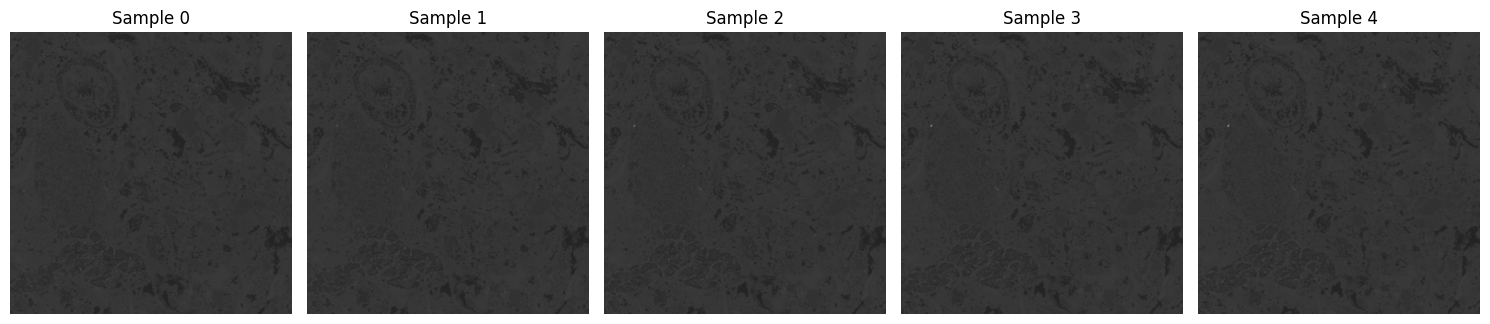

In [2]:
# Folder path
folder_path = "Data"

# Sorted images
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".bmp")])

# Select the first five images
selected_images = image_files[:5]

# Show images for horizontal structure form
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Looping to call the images
for i, img_name in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

    axes[i].imshow(img, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Sample {i}")

# Plot the images
plt.tight_layout()
plt.show()

# Histogram and CDF on one image

<b>Load the first image as a sample</b>

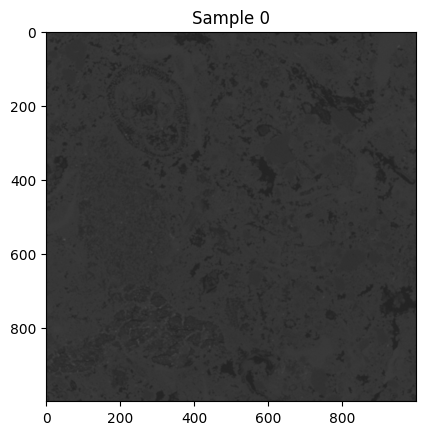

In [3]:
# Load image
img = cv2.imread('Data/dlm0000.bmp', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
assert img is not None, "file could not be read, check with os.path.exists()"
# Plot the image
plt.title("Sample 0")
plt.imshow(img, cmap='gray')

<b>Calculating The Histogram</b>

In [4]:
# Calculate histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
# Calculate cumulative distribution function
cdf = hist.cumsum()
# Normalize the cdf result
cdf_normalized = cdf * float(hist.max()) / cdf.max()

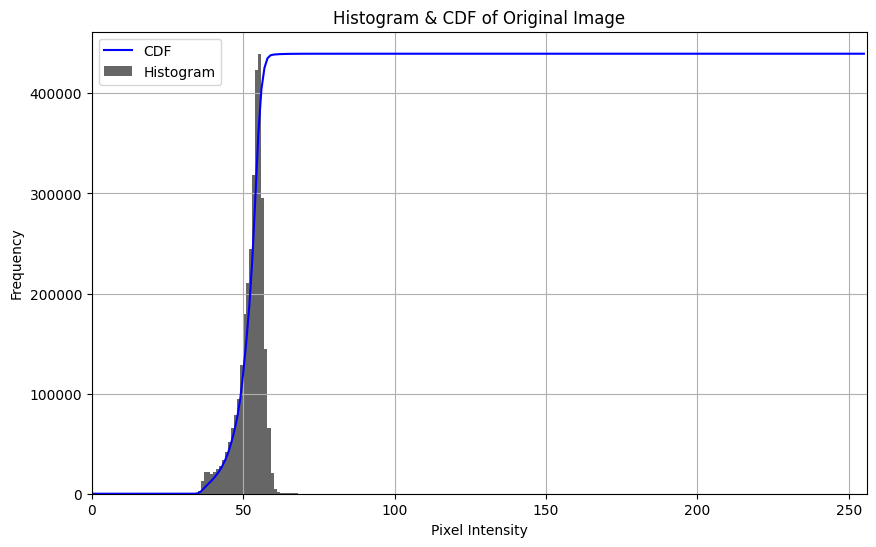

In [5]:
# Plot result the histogram and CDF
plt.figure(figsize=(10, 6))
plt.plot(cdf_normalized, color='b', label='CDF')
plt.hist(img.flatten(), 256, [0, 256], color='black', alpha=0.6, label='Histogram')
plt.xlim([0, 256])
plt.legend(loc='upper left')
plt.title('Histogram & CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<b>Applying CHLAHE for Image Enchancement</b>

In [6]:
# Change Image to Grayscale
img = cv2.imread('Data/dlm0000.bmp', cv2.IMREAD_GRAYSCALE)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

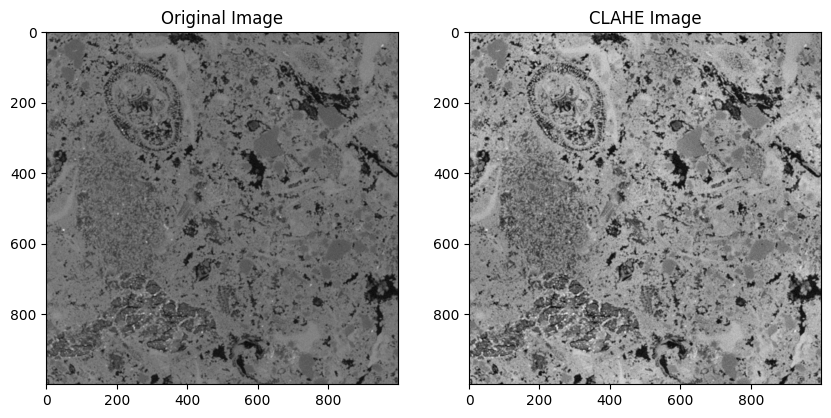

In [7]:
# Plot result comparision
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cl1, cmap='gray'), plt.title('CLAHE Image')
plt.show()

<b>Calculate Histogram After CLAHE</b>

In [8]:
hist,bins = np.histogram(cl1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

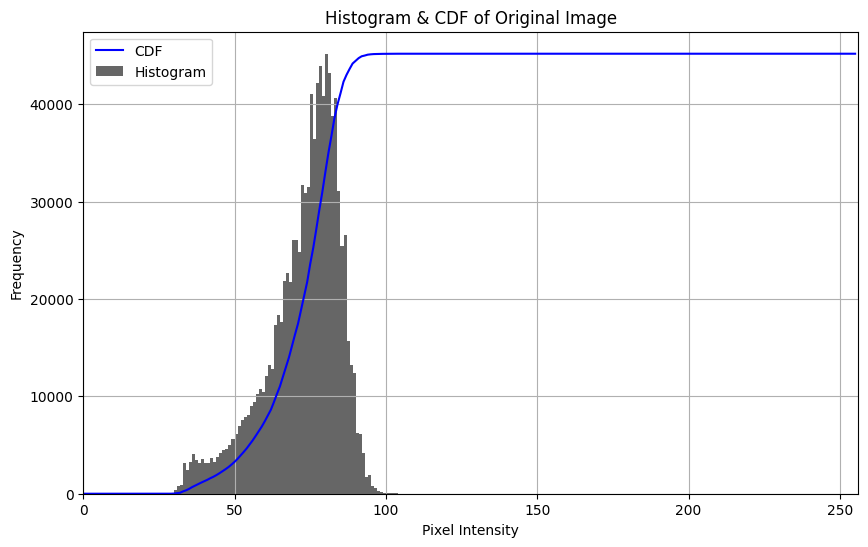

In [9]:
# Plot result the histogram and CDF
plt.figure(figsize=(10, 6))
plt.plot(cdf_normalized, color='b', label='CDF')
plt.hist(cl1.flatten(), 256, [0, 256], color='black', alpha=0.6, label='Histogram')
plt.xlim([0, 256])
plt.legend(loc='upper left')
plt.title('Histogram & CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Applying Image Enhancement for all of the Images

<b>Parameter</b>

In [10]:
folder = 'Data'
image_files = [f for f in os.listdir(folder) if f.endswith(('.bmp', '.png', '.jpg'))]
histograms = []
cdfs = []
clahe_histograms = []
clahe_cdfs = []
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
save_folder = 'Data_enhancement'

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

<b>Calculate Average Histogram and CDF from All Images</b>

In [11]:
for file in tqdm(image_files):
    img_path = os.path.join(folder, file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist = hist / hist.sum()
        histograms.append(hist.flatten())

        cdf = np.cumsum(hist)
        cdf = cdf / cdf[-1]
        cdfs.append(cdf.flatten())
    else:
        print(f"Fail to read {file}")

# Convert to numpy array
histograms = np.array(histograms)
cdfs = np.array(cdfs)

# Calculate Average Histogram and CDF
mean_histogram = np.mean(histograms, axis=0)
mean_cdf = np.mean(cdfs, axis=0)

100%|██████████| 851/851 [00:02<00:00, 357.95it/s]


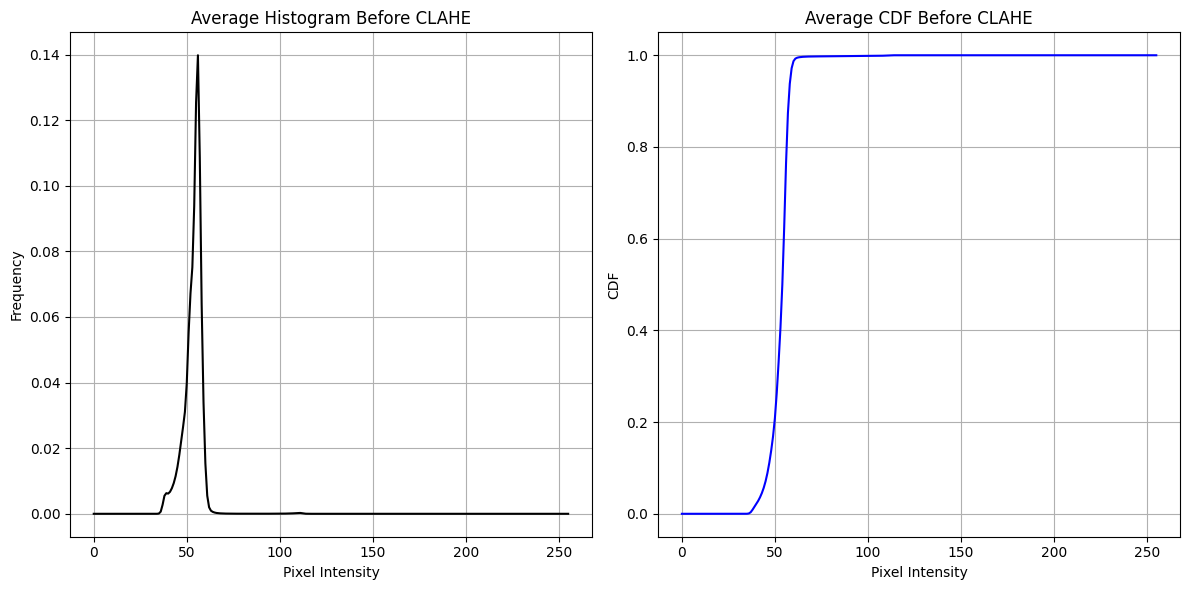

In [12]:
# Plot Result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(mean_histogram, color='black')
plt.title('Average Histogram Before CLAHE')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mean_cdf, color='blue')
plt.title('Average CDF Before CLAHE')
plt.xlabel('Pixel Intensity')
plt.ylabel('CDF')
plt.grid()

plt.tight_layout()
plt.show()

<b>Applying CLAHE and Calculating The histogram and CDF for All Images</b>

In [13]:
for file in tqdm(image_files):
    img_path = os.path.join(folder, file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Apply CLAHE
        clahe_image = clahe.apply(image)
        
        # Save Image
        filename = f"CLAHE_{file}"
        cv2.imwrite(os.path.join(save_folder, filename), clahe_image)

        # Histogram after CLAHE
        clahe_hist = cv2.calcHist([clahe_image], [0], None, [256], [0, 256])
        clahe_hist = clahe_hist / clahe_hist.sum()
        clahe_histograms.append(clahe_hist.flatten())

        clahe_cdf = np.cumsum(clahe_hist)
        clahe_cdf = clahe_cdf / clahe_cdf[-1]
        clahe_cdfs.append(clahe_cdf.flatten())
    else:
        print(f"Fail to read {file}")
# Convert to numpy array
clahe_histograms = np.array(clahe_histograms)
clahe_cdfs = np.array(clahe_cdfs)
# Calculate average Histogram and CDF
mean_clahe_histogram = np.mean(clahe_histograms, axis=0)
mean_clahe_cdf = np.mean(clahe_cdfs, axis=0)

100%|██████████| 851/851 [00:02<00:00, 313.85it/s]


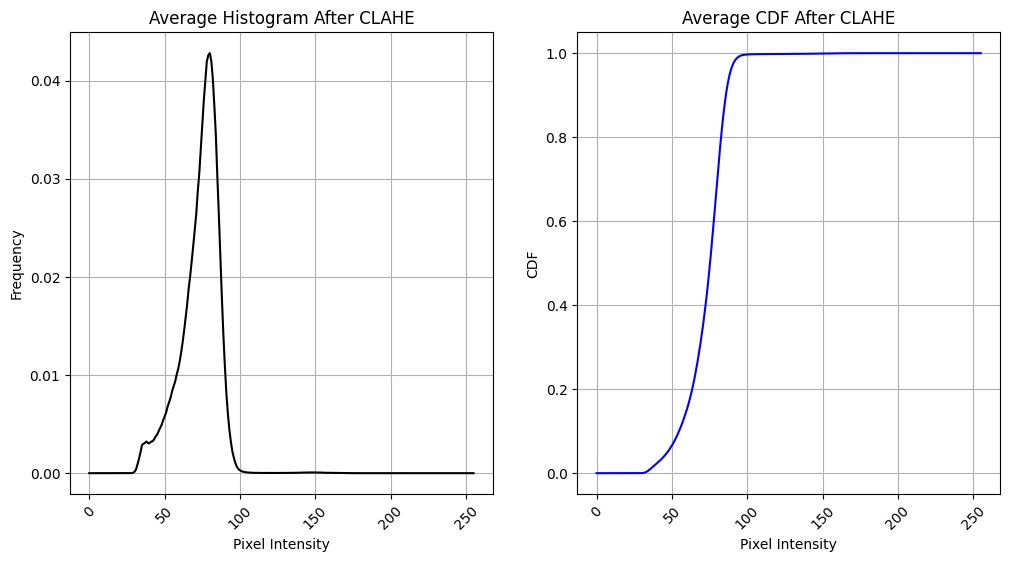

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mean_clahe_histogram, color='black')
plt.title('Average Histogram After CLAHE')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 256, 50), rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(mean_clahe_cdf, color='blue')
plt.title('Average CDF After CLAHE')
plt.xlabel('Pixel Intensity')
plt.ylabel('CDF')
plt.xticks(np.arange(0, 256, 50), rotation=45)
plt.grid()